## Exploratory Data Analysis

In [1]:
import pandas as pd

path = 'csv_files/'

df = pd.read_csv(path + '2008_election_us.csv', usecols=['state', 'county', 'dem_share'])

df.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


In [2]:
# we should explore data first graphically
import matplotlib.pyplot as plt

plt.hist(df.dem_share, edgecolor='black', linewidth=1.2)
#counts, bins, patches = plt.hist(x=df.dem_share, bins=10,
                                 #color='blue', edgecolor='black', linewidth=1.2)

plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')

plt.show()

<Figure size 640x480 with 1 Axes>

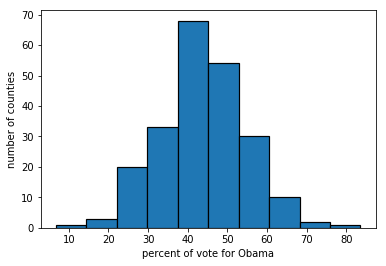

In [3]:
# using dummy variable '_' we can only get the plot and not returned 3 arrays in the background
_ = plt.hist(df.dem_share, edgecolor='black', linewidth=1.2)

_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.show()

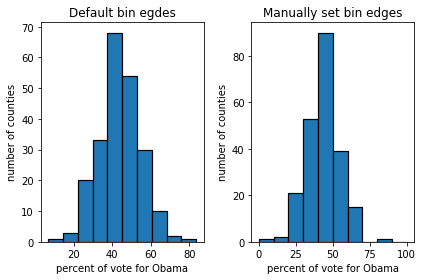

In [4]:
# setting the bins of a histogram
bin_edges = [x for x in range(0, 101, 10)]

plt.subplot(1, 2, 1)
_ = plt.hist(df.dem_share, edgecolor='black', linewidth=1.2)

_ = plt.title('Default bin egdes')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.subplot(1, 2, 2)
_ = plt.hist(df.dem_share, edgecolor='black', linewidth=1.2, bins=bin_edges)

_ = plt.title('Manually set bin edges')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.tight_layout()

plt.show()

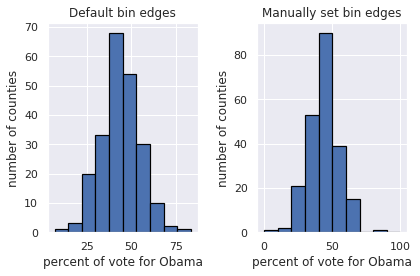

In [5]:
import seaborn as sns

sns.set() # we can get the default seaborn plot styles

bin_edges = [x for x in range(0, 101, 10)]

plt.subplot(1, 2, 1)
_ = plt.hist(df.dem_share, edgecolor='black', linewidth=1.2)

_ = plt.title('Default bin edges')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.subplot(1, 2, 2)
_ = plt.hist(df.dem_share, edgecolor='black', linewidth=1.2, bins=bin_edges)

_ = plt.title('Manually set bin edges')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.tight_layout()

plt.show()

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

### Bee swarm plots

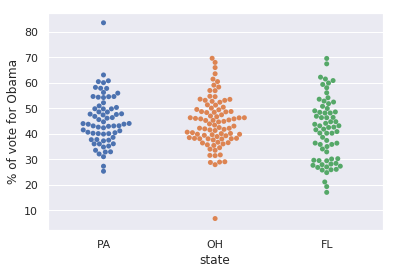

In [6]:
_ = sns.swarmplot(x='state', y='dem_share', data=df)

_ = plt.xlabel('state')
_ = plt.ylabel('% of vote for Obama')

plt.show()


### Empirical cumulative distribution function ECDF

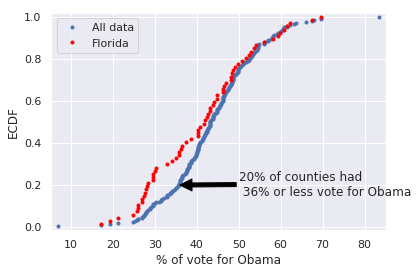

In [7]:
import numpy as np

x = np.sort(df.dem_share)
y = np.arange(1, len(x) + 1) / len(x)

_ = plt.plot(x, y, marker='.', linestyle='none', label='All data')

x_2 = np.sort(df[df.state == 'FL']['dem_share'])
y_2 = np.arange(1, len(x_2) + 1) / len(x_2)

_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='red', label='Florida')

_ = plt.xlabel('% of vote for Obama')
_ = plt.ylabel('ECDF')

plt.margins(0.02) # Keeps data off plot edges (2% buffer allaround the plot)

plt.annotate('20% of counties had \n 36% or less vote for Obama', 
             xytext=(50, 0.15), xy=(36, 0.2), arrowprops={'color': 'black'})

plt.legend()

plt.show()

In [8]:
# constructing ECDF function
def ecdf(data): # converts 1D array into x and y coordinates
    
    # number of data points 
    n = len(data)
    
    # x values
    x = np.sort(data)
    
    # y values
    y = np.arange(1, 1+n) / n
    
    return x, y

## Summary statistics

### Sample mean and median

Mean is easy to calculate but is heavily influenced by the outliers, values that vary heavily from the mean.

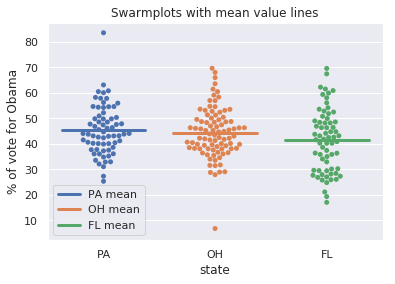

In [9]:
ax = sns.swarmplot(x='state', y='dem_share', data=df)

_ = plt.xlabel('state')
_ = plt.ylabel('% of vote for Obama')
_ = plt.title('Swarmplots with mean value lines')


# We can limit the width of each median line to its respective column by looping 
# through the Axes ticks and ticklabels after generating the stripplot. This also 
# enables the code to operate independent of the number of samples (columns) to be plotted.

colors = ['red', 'blue', 'purple']

# distance across the "PA", "OH" or "FL" stipplot column to span, in this case 40%
mean_width = 0.75

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = text.get_text()  # 'PA', 'OH', or 'FL'

    # calculate the mean values for each state
    state_mean = np.mean(df[df.state == sample_name]['dem_share'])

    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick - mean_width/2, tick + mean_width/2], [state_mean, state_mean], 
            lw=3, label=sample_name + ' mean')

_ = plt.legend()

plt.show()

Median is not influenced by the outliers.

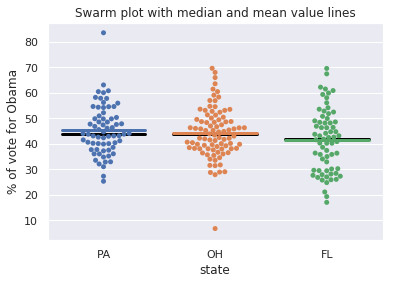

In [10]:
ax = sns.swarmplot(x='state', y='dem_share', data=df)

_ = plt.xlabel('state')
_ = plt.ylabel('% of vote for Obama')
_ = plt.title('Swarm plot with median and mean value lines')

line_width = 0.75

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    
    state_name = text.get_text()  # 'OH', 'PA' or 'FL'
    
    state_mean = np.mean(df[df.state == state_name]['dem_share'])
    state_median = np.median(df[df.state == state_name]['dem_share'])
    
    # plotting median lines
    ax.plot([tick - line_width/2, tick + line_width/2], [state_median, state_median],
            color='black', lw=3)
    
    # plotting mean lines
    ax.plot([tick - line_width/2, tick + line_width/2], [state_mean, state_mean], 
            lw=3)
    
plt.show()

#### Adding vertical lines to a swarm plot function

In [11]:
def hline_to_swarmp(axis, y_value, **kwargs):
    """ This function adds horizontal lines to swarmplots. 
        Parameters:
            
            axis - axis variable (ax = sns.swarmplot())
            
            y_value - y coordinate value, at which height the
                      horizontal line is drawn
                      
            **kwargs - key-value pairs:
                line_spawn - the length of the horizontal line 
                             to be drawn, default=0.75 (75%)
                             
                line_width - line width to be drawn, Default 1
                
                color - color of the line. Default takes tke color
                        of the data points
                label - label of the drawn line"""
    
    line_spawn = kwargs.get('line_spawn', 0.75)
    line_width = kwargs.get('line_width', 1)
    color = kwargs.get('color', None)
    label = kwargs.get('label', None)
    
    i = 0
    for tick, text in zip(axis.get_xticks(), axis.get_xticklabels()):
        
        x_label = text.get_text()
        
        axis.plot([tick - line_spawn/2, tick + line_spawn/2], [y_value[i], y_value[i]],
                  lw=line_width, color=color, label=x_label + ' ' + label)
        i += 1

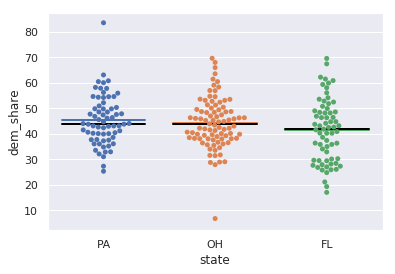

In [12]:
state_means = [np.mean(df[df.state == state_name]['dem_share']) for state_name in df.state.unique()]
state_medians = [np.median(df[df.state == state_name]['dem_share']) for state_name in df.state.unique()]

ex = sns.swarmplot(x='state', y='dem_share', data=df)

hline_to_swarmp(axis=ex, y_value=state_means, line_width=2, label='mean')
hline_to_swarmp(axis=ex, y_value=state_medians, line_width=2, color='black', label='median')

plt.show()

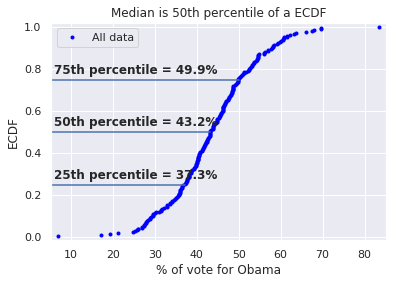

In [13]:
# median is the 50th percentile of a ECDF or sorted data

x, y = ecdf(df.dem_share)
median_value = np.median(df.dem_share)
percentiles = np.percentile(df.dem_share, [25, 75])

_ = plt.plot(x, y, marker='.', linestyle='none', label='All data', color='blue')

_ = plt.axhline(y=0.5, xmin=0, xmax=0.475)  # for the median (50th percentile)
_ = plt.axhline(y=0.25, xmin=0, xmax=0.4)  # for 25th percentile
_ = plt.axhline(y=0.75, xmin=0, xmax=0.56)  # for the 75th percentile

_ = plt.xlabel('% of vote for Obama')
_ = plt.ylabel('ECDF')
_ = plt.title('Median is 50th percentile of a ECDF')

_ = plt.annotate('50th percentile = ' + '%.1f' % median_value + '%', xy=(6, 0.53), weight='bold')
_ = plt.annotate('25th percentile = ' + '%.1f' % percentiles[0] + '%', xy=(6, 0.28), weight='bold')
_ = plt.annotate('75th percentile = ' + '%.1f' % percentiles[1] + '%', xy=(6, 0.78), weight='bold')

plt.legend()
plt.margins(0.02)
plt.show()

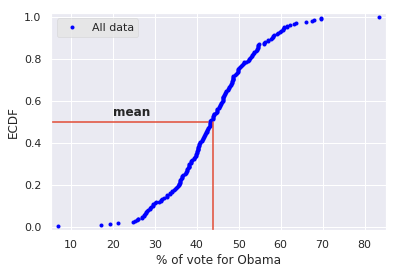

In [14]:
x = np.sort(df.dem_share)
y = np.arange(1, len(x) + 1) / len(x)

_ = plt.plot(x, y, marker='.', linestyle='none', label='All data', color='blue')
_ = plt.axvline(x=np.mean(df.dem_share), ymin=0, ymax=0.5)
_ = plt.axhline(y=0.5, xmin=0, xmax=0.47)

_ = plt.xlabel('% of vote for Obama')
_ = plt.ylabel('ECDF')

_ = plt.annotate('mean', xy=(20, 0.53), weight='bold')

plt.style.use('ggplot')

plt.margins(0.02)
plt.legend()
plt.show()

### Box plots

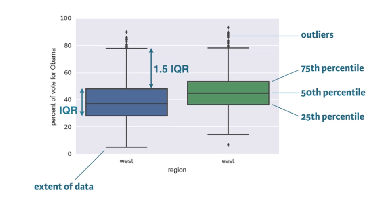

In [4]:
import matplotlib.pyplot as plt
im_path = 'images/'

img = plt.imread(im_path + 'box_plot.png') # image is read into 3D numpy array

_ = plt.imshow(img)
_ = plt.axis('off')

plt.show()

The edges of the boxes are 75th and 25th percentiles with midlle line of 50th percentile (median). The total height of the box contains 50% of the data and is called Inter Quartile Range (IQR). The whiscers extend 1.5 times the IQR or the extent of the data - whichever is less extreme. All points outside of whiskers are plotted as points which are often marked as outliers. Usually an outlier is a data point that is more than 2 IQR away from the median.

### Variance

We can quantify the variability of data with variance. The variance is the average squared distance from their mean. 

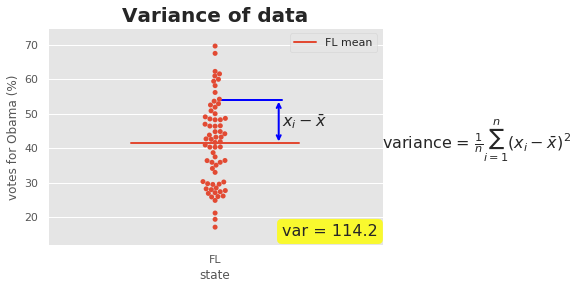

In [123]:
df_fl = df[df.state == 'FL']

ax = sns.swarmplot(x='state', y='dem_share', data=df_fl)
fl_mean = np.mean(df_fl.dem_share)
fl_variance = np.var(df.dem_share)

_ = plt.xlabel('state')
_ = plt.ylabel('votes for Obama (%)')
_ = plt.title('Variance of data', fontsize=20, weight='bold')

hline_to_swarmp(axis=ax, y_value=[fl_mean], label='mean', line_spawn=0.5, line_width=2)

_ = plt.axhline(y=54, xmin=0.515, xmax=0.7, color='blue', lw=2)

_ = plt.annotate(s='', xy=(0.19, fl_mean), xytext=(0.19, 54), 
                 arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
_ = plt.annotate(s=r'$x_i - \bar x$', xy=(0.2, 46.5), fontsize=16)
_ = plt.annotate(s=r'variance = $\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2$', xy=(0.5, 40), fontsize=16)
_ = plt.annotate(s='var = %.1f' % fl_variance, xy=(0.2, 14.5), fontsize=16,
                 bbox=dict(color='yellow', alpha=0.8, boxstyle='round'))
_ = plt.margins(0.1)
_ = plt.legend()

plt.show()

### Standard deviation

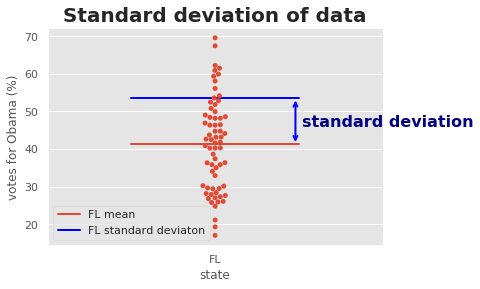

In [148]:
ax = sns.swarmplot(x='state', y='dem_share', data=df_fl)

fl_std = np.std(df_fl.dem_share)

_ = plt.xlabel('state')
_ = plt.ylabel('votes for Obama (%)')
_ = plt.title('Standard deviation of data', fontsize=20, weight='bold')

hline_to_swarmp(axis=ax, y_value=[fl_mean], label='mean', line_spawn=0.5, line_width=2)
hline_to_swarmp(axis=ax, y_value=[fl_std + fl_mean], label='standard deviaton', color='blue', 
                line_spawn=0.5, line_width=2)

_ = plt.annotate(s='', xytext=(0.24, fl_std + fl_mean), xy=(0.24, fl_mean), 
                 arrowprops=dict(arrowstyle='<->', color='blue', lw=2))

_ = plt.annotate('standard deviation', xy=(0.26, 46), weight='bold', color='navy', fontsize=16)

_ = plt.legend(loc='lower left')

plt.show()

In [150]:
path = '/home/ilves/Documents/Python_Learning/jupyter_files/csv_files/'

df = pd.read_csv(filepath_or_buffer=path + '2008_election_us.csv')
df.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


## Covariance

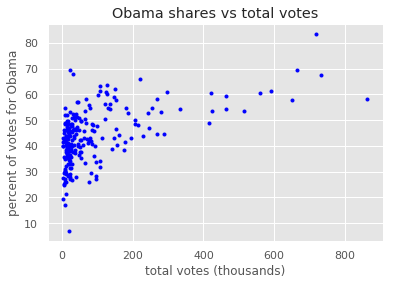

In [152]:
# lets plot dem_share vs total_votes
_ = plt.plot(df.total_votes/1000, df.dem_share, 
             marker='.', linestyle='none', color='blue')

_ = plt.title('Obama shares vs total votes')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of votes for Obama')

plt.show()


We would like to investigate how Obama vote share varies with total vote count. Covariance - a measure how two quantitites vary together. Lets annotate previous plot.

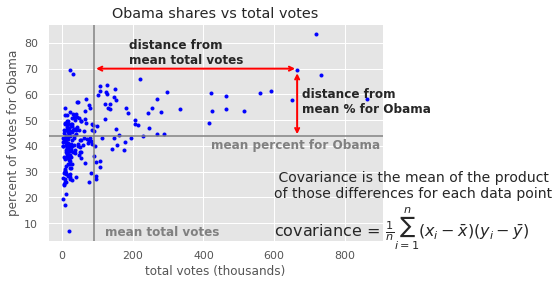

In [206]:
mean_share = np.mean(df.dem_share)
mean_totalv = np.mean(df.total_votes/1000)

ax = plt.plot(df.total_votes/1000, df.dem_share, 
             marker='.', linestyle='none', color='blue')

_ = plt.axhline(y=mean_share, color='gray')
_ = plt.axvline(x=mean_totalv, color='gray')

_ = plt.title('Obama shares vs total votes')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of votes for Obama')

_ = plt.annotate(s='mean percent for Obama', xy=(420, 39), fontsize=12, color='gray', weight='bold')
_ = plt.annotate(s='mean total votes', xy=(120, 5), fontsize=12, color='gray', weight='bold')
_ = plt.annotate(s='', xy=(mean_totalv, 70), xytext=(665, 70), 
                 arrowprops=dict(arrowstyle='<->', color='red', lw=2))
_ = plt.annotate(s='', xy=(665, mean_share), xytext=(665, 69), 
                 arrowprops=dict(arrowstyle='<->', color='red', lw=2))

_ = plt.annotate(s='distance from\nmean total votes', xy=(190, 72), weight='bold', fontsize=12)
_ = plt.annotate(s='distance from\nmean % for Obama', xy=(680, 53), weight='bold', fontsize=12)
_ = plt.annotate(s=' Covariance is the mean of the product\nof those differences for each data point',
                 xy=(600, 20), fontsize=14)
_ = plt.annotate(s=r'covariance = $\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)$', 
                 xy=(600, 5), fontsize=16)

plt.show()

If the datapoints tend to be both above or below from their respective mean values together as in this example the covariance is positive. Thus, when x is high y is high and vice versa. The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. 

In [219]:
obama_vote_covariance = np.cov(df.total_votes/1000, df.dem_share)
obama_vote_covariance

array([[20245.10393632,   817.30936184],
       [  817.30936184,   114.76344739]])

In [223]:
print("Covariances of 'x' and 'y' are [0,1] & [1,0] : %.1f \n "
      "Variance of 'x' is [0,0] : %.1f \n "
      "Variance of 'y' is [1,1] : %.1f" % (obama_vote_covariance[0][1],
                                         obama_vote_covariance[0][0],
                                         obama_vote_covariance[1][1]))

Covariances of 'x' and 'y' are [0,1] & [1,0] : 817.3 
 Variance of 'x' is [0,0] : 20245.1 
 Variance of 'y' is [1,1] : 114.8


## Pearson correlation coefficent

If we want to have more general applicable measure of how two quantities depend on each other we want it to be dimensionless, without any units. If we divide the covariance with the standard deviations of the quantities we get such a measure - a correlation coefficient or Pearson coefficent.

$\rho \qquad = \qquad \text{Pearson}\quad \text{correlation} \qquad =  \qquad \frac{\text{covariance}}{(\text{std  of  x}) (\text{std  of  y})} \qquad = \qquad \frac{\text{variability due to codependence}}{\text{independent variability}}$

In [225]:
correlation_coef = np.corrcoef(df.total_votes/1000, df.dem_share)
correlation_coef

array([[1.        , 0.53619736],
       [0.53619736, 1.        ]])

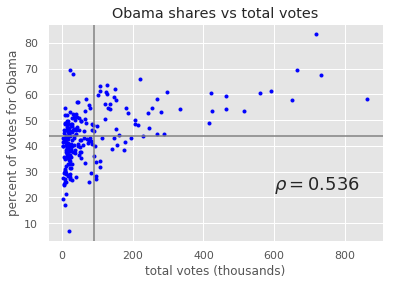

In [234]:
correlation_coef = np.corrcoef(df.total_votes/1000, df.dem_share)

ax = plt.plot(df.total_votes/1000, df.dem_share, 
             marker='.', linestyle='none', color='blue')

_ = plt.axhline(y=mean_share, color='gray')
_ = plt.axvline(x=mean_totalv, color='gray')

_ = plt.title('Obama shares vs total votes')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of votes for Obama')

_ = plt.annotate(s=r'$\rho = %.3f$' % correlation_coef[0, 1], xy=(600, 23), fontsize=18, weight='bold')

plt.show()

## Probabilistic logic and statistical inference

### Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. 

In [237]:
def bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes.
    Parameters:
        n - number of trials
        p - success probability
    Returns: number of successes."""
    
    n_success = 0
    
    #Perform trials
    for i in range(n):
        
        # Choose random number between zero and one: random_number
        random_nr = np.random.random()
        
        # If less than p, it's a success so add one to n_success
        if random_nr < p:
            n_success += 1
            
    return n_success

### Random number generation and hacker statistics

In Python context:
	1 = True
	0 = False

In [235]:
# Getting the probability of getting four consequtive heads (tails) in a coin doss.
n_all_heads = 0

np.random.seed(42)

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
probability = n_all_heads / 10000

probability

0.0618

### Probability mass function (PMF)

The set of probabilities of discrete outcomes.

### Probability distribution

A mathematical description of outcomes

### Binominal distribution

The number $\it{r}$ of successes in $\it{n}$ Bernoulli trials with probability $\it{p}$ of success, is Binominally distriuted.

The number $\it{r}$ of heads in 4 coin flips with probability 0.5 of heads, is Binominally distributed.

In [239]:
np.random.binomial(4, 0.5)  # 4 coin dosses with 50% chance of getting tails

1

In [241]:
np.random.binomial(4, 0.5, size=10)

array([3, 3, 1, 2, 2, 2, 0, 3, 1, 4])

/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


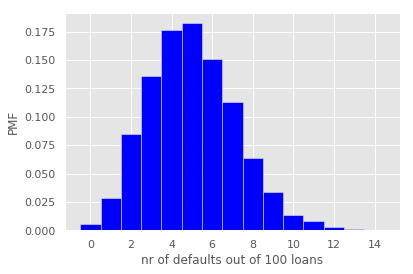

In [244]:
# The Binominal PMF

samples = np.random.binomial(100, 0.05, size=10000)
bins = np.arange(0, max(samples) + 1.5) - 0.5

_ = plt.hist(samples, bins=bins, normed=True, color='blue')
_ = plt.ylabel('PMF')
_ = plt.xlabel('nr of defaults out of 100 loans')
plt.show()

### Poisson process and Poisson distribution

Poisson process is a process in which each individual measure, event is independent of each other.

The number 'r' of arrivals of a Poisson process in a given time interval with average rate of $\lambda$ arrivals per interval is Poisson distributed.

The number 'r' of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.

Poisson distribution is the specail case of Binominal distribution for low probability of success and large number of trials.

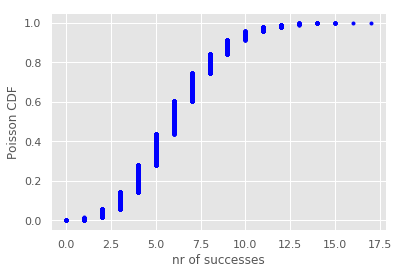

In [246]:
# The Poisson CDF
samples = np.random.poisson(6, size=10000)

x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none', color='blue')

_ = plt.xlabel('nr of successes')
_ = plt.ylabel('Poisson CDF')

plt.show()

## Probability Density Functions (PDF)

### Normal distribution

Describes continous variables whose PDF has a single symmetric peak. There are two parameters for normal distribution: 'MEAN' and 'STANDARD DEVIATION' and these shall not be confused with calculated means and std from ordinary data!!!

In [255]:
df = pd.read_csv(path + 'morley.csv', usecols=['Speed'])
df.head(3)

,Speed
0,850
1,740
2,900


In [256]:
# Michelson data from the speed of light experiments

df.Speed = df.Speed + 299000
df.head()

,Speed
0,299850
1,299740
2,299900
3,300070
4,299930


/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


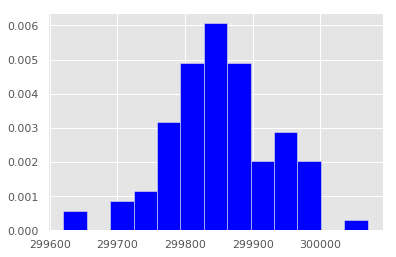

In [260]:
mean = np.mean(df.Speed)
std = np.std(df.Speed)

samples = np.random.normal(mean, std, size=10000)

_ = plt.hist(df.Speed, bins='auto', color='blue', normed=True)
_ = plt.plot()

plt.show()

#### Checking normality of Michelson data

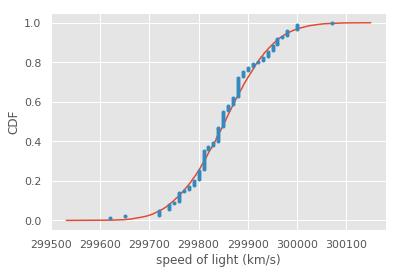

In [259]:
# mean and std from calculated mean and std are good estimates for
# the normal distribution but THEY ARE NOT THE SAME THING!
mean = np.mean(df.Speed)

std = np.std(df.Speed)

samples = np.random.normal(mean, std, size=10000)

x, y = ecdf(df.Speed)

x_theoretical, y_theoretical = ecdf(samples)

_ = plt.plot(x_theoretical, y_theoretical)

_ = plt.plot(x, y, marker='.', linestyle='none')

_ = plt.xlabel('speed of light (km/s)') 
_ = plt.ylabel('CDF') 

plt.show()

As can be seen the Michelson data is approximately normally distributed.

/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


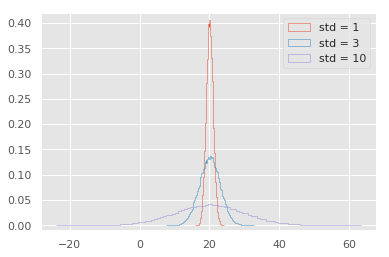

In [262]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)


# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

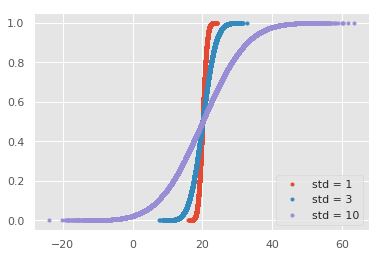

In [264]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

What is the probability of the speed of light being >= 300 000 km/s???

/home/ilves/Documents/Python_Learning/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


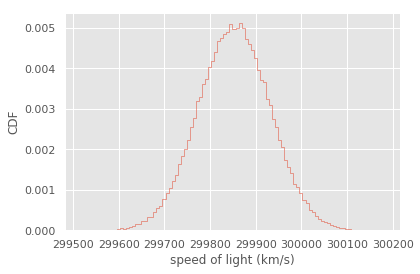

(None, 'Probability of c >= 300,000 km/s is 0.030')

In [284]:
# lets assume that the morleys speed of light experiment is normally distribued
mu = np.mean(df.Speed)
sigma = np.std(df.Speed)

# lets create 100,000 samples with calculated mean and std values from the data
samples = np.random.normal(loc=mu, scale=sigma, size=100000)

# lets find the probability of having the speed of light as big as or bigger than 3e5 km/s
prob = np.sum(samples >= 3e5) / 100000

# lets plot the graph
_ = plt.hist(samples, histtype='step', bins=100, normed=True)

_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')

plt.show(), 'Probability of c >= 300,000 km/s is %.3f' % prob

In [273]:
prob

0.03075